# Exploration of 2023-03-metropolitan-street.csv
##### Trupti Kolvekar

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('data/csv/police_datasets/police_datasets_raw_uncleansed/2023-03/2023-03-metropolitan-street.csv')

# Convert headers to lowercase and replace whitespace with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Convert columns to string type
df = df.astype(str)

# Convert row values to lowercase and replace whitespace with underscores
df = df.apply(lambda x: x.str.lower().str.replace(' ', '_'))

# Count the number of entries with 'no_location' in the location column
no_location_count = df[df['location'] == 'no_location'].shape[0]

# Format the count with commas
formatted_count = format(no_location_count, ",")

# Print the count and a formatted statement
print(f"{formatted_count} entries have no location recorded and will be removed from our analysis.")

# Remove rows with 'no_location' in the location column
df = df[df['location'] != 'no_location']

4,047 entries have no location recorded and will be removed from our analysis.


In [5]:
# Print all column names
column_names = df.columns.tolist()
print(column_names)

['crime_id', 'month', 'reported_by', 'falls_within', 'longitude', 'latitude', 'location', 'lsoa_code', 'lsoa_name', 'crime_type', 'last_outcome_category', 'context']


In [3]:
# Select the desired columns
selected_columns = ['crime_id', 'longitude', 'latitude', 'lsoa_name', 'crime_type', 'last_outcome_category']
df_selected = df[selected_columns]

# Replace "NaN" values with actual NaN values
df_selected.replace("nan", np.nan, inplace=True)

# Count the missing values in each column
missing_values = df_selected.isnull().sum()

# Display the table of missing values with formatted numbers
for column, count in missing_values.items():
    formatted_count = "{:,}".format(count)
    print(f"Column '{column}' has {formatted_count} missing values")

# Filter the DataFrame to remove rows with missing values
df_selected = df_selected.dropna()

# Remove the last 5 characters from each row in 'lsoa_name' column
df_selected['lsoa_name'] = df_selected['lsoa_name'].str[:-5]

Column 'crime_id' has 16,391 missing values
Column 'longitude' has 0 missing values
Column 'latitude' has 0 missing values
Column 'lsoa_name' has 0 missing values
Column 'crime_type' has 0 missing values
Column 'last_outcome_category' has 16,391 missing values


C:\Users\Trudy\Anaconda3\lib\site-packages\pandas\core\frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [4]:
# Initial shape of the DataFrame
initial_shape = df.shape

# Shape of the DataFrame after data cleaning and selection
cleaned_shape = df_selected.shape

# Format the shapes with commas
initial_shape_str = "{:,} columns and {:,} rows".format(initial_shape[1], initial_shape[0])
cleaned_shape_str = "{:,} columns and {:,} rows".format(cleaned_shape[1], cleaned_shape[0])

# Print the formatted strings
print("This DataFrame had {} and after data cleaning, we have {}".format(initial_shape_str, cleaned_shape_str))

This DataFrame had 12 columns and 88,786 rows and after data cleaning, we have 6 columns and 72,395 rows


In [5]:
# Get the number of unique categories and their counts for each column
lsoa_name_counts = df['lsoa_name'].nunique()
crime_type_counts = df['crime_type'].nunique()
last_outcome_category_counts = df['last_outcome_category'].nunique()

# Display the results
print("Number of unique categories and their counts:")
print("lsoa_name:", lsoa_name_counts)
print("crime_type:", crime_type_counts)
print("last_outcome_category:", last_outcome_category_counts)

Number of unique categories and their counts:
lsoa_name: 5060
crime_type: 14
last_outcome_category: 8


In [6]:
# Read the "neighbourhoods.csv" file into a new DataFrame
neighbourhoods_df = pd.read_csv('data/csv/police_datasets/police_datasets_raw_uncleansed/2023-03/2023-03-metropolitan-street.csv')

# Modify the "neighbourhood" column to remove capital letters and replace whitespace with underscores
neighbourhoods_df['neighbourhood'] = neighbourhoods_df['neighbourhood'].str.lower().str.replace(' ', '_')

# Create a new column in df_selected called "matched_neighbourhood" and initialize it with "not_found"
df_selected['matched_neighbourhood'] = 'not_found'

# Iterate over each row in df_selected and compare the "lsoa_name" with the modified "neighbourhood" column
for index, row in df_selected.iterrows():
    lsoa_name = row['lsoa_name']
    matching_neighbourhood = neighbourhoods_df[neighbourhoods_df['neighbourhood'].str.contains(lsoa_name, regex=False)]
    if not matching_neighbourhood.empty:
        df_selected.at[index, 'matched_neighbourhood'] = matching_neighbourhood['neighbourhood'].values[0]

In [7]:
# Display some of the rows in df_selected where "matched_neighbourhood" is "not_found"
not_found_entries = df_selected[df_selected['matched_neighbourhood'] == 'not_found'].head(10)

# Count the occurrences of not found entries by "lsoa_name"
not_found_counts = not_found_entries['lsoa_name'].value_counts().reset_index()
not_found_counts.columns = ['lsoa_name', 'count']

# Display the table of not found entries and their counts
print(not_found_counts)

               lsoa_name  count
0               basildon      3
1         aylesbury_vale      2
2           amber_valley      1
3                babergh      1
4                ashford      1
5                   arun      1
6  basingstoke_and_deane      1


In [8]:
# Filter the rows where partial match was found
df_selected = df_selected[df_selected['matched_neighbourhood'] != 'not_found']

# Get the shape of the updated df_selected DataFrame
selected_shape = df_selected.shape

# Format and print the shape
formatted_shape = "{:,} columns and {:,} rows".format(selected_shape[1], selected_shape[0])
print("This DataFrame had {}.".format(formatted_shape))

This DataFrame had 7 columns and 72,103 rows.


In [9]:
# Get the number of categories for lsoa_name
lsoa_name_categories = df_selected['lsoa_name'].nunique()

# Print the number of categories for lsoa_name
print(f"Number of categories for lsoa_name: {lsoa_name_categories}")

Number of categories for lsoa_name: 33


In [15]:
# Get the number of unique categories and their counts for neighbourhood
neighbourhood_counts = df_selected['matched_neighbourhood'].value_counts()

# Print the counts for neighbourhood
print("Counts for neighbourhood:")
print(neighbourhood_counts)

Counts for neighbourhood:
westminster               6845
camden                    3203
tower_hamlets             2940
newham                    2883
southwark                 2836
lambeth                   2687
croydon                   2686
ealing                    2623
haringey                  2616
enfield                   2552
hackney                   2550
brent                     2498
islington                 2396
lewisham                  2392
barnet                    2385
greenwich                 2214
hillingdon                2167
wandsworth                2091
hounslow                  2052
redbridge                 1960
bromley                   1956
waltham_forest            1882
hammersmith_and_fulham    1746
barking_and_dagenham      1711
kensington_and_chelsea    1706
havering                  1669
bexley                    1340
harrow                    1285
merton                    1074
richmond_upon_thames      1040
kingston_upon_thames      1034
sutton       

In [10]:
#save
df_selected.to_csv('C:\\Users\\Trudy\\Desktop\\march_crime_qcd.csv', index=False)

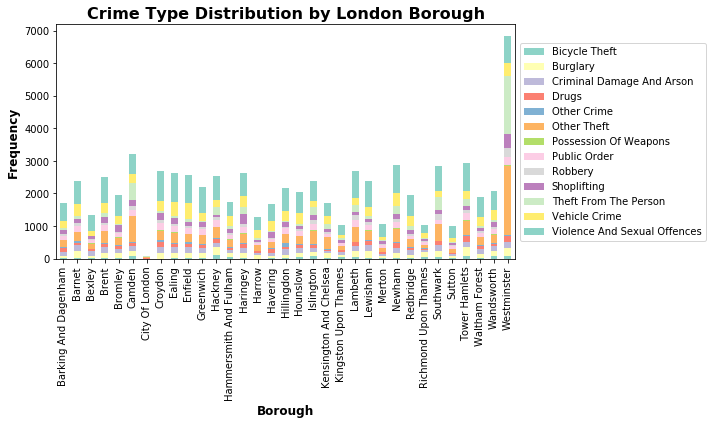

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

# Group the data by lsoa_name and crime_type, and calculate the count
grouped_data = df_selected.groupby(['lsoa_name', 'crime_type']).size().unstack()

# Create a stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=plt.cm.Set3.colors)

# Set the labels and title
ax.set_xlabel('Borough', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax.set_title('Crime Type Distribution by London Borough', fontsize=16, fontweight='bold')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Modify x-axis labels
labels = [label.replace('_', ' ').title() for label in grouped_data.index]
ax.set_xticklabels(labels)

# Modify legend labels
legend_labels = [label.replace('_', ' ').title() for label in grouped_data.columns]
ax.legend(labels=legend_labels, loc='center left', bbox_to_anchor=(1.0, 0.5))

# Adjust the layout to accommodate the legend
plt.tight_layout()

# Display the stacked bar chart
plt.show()



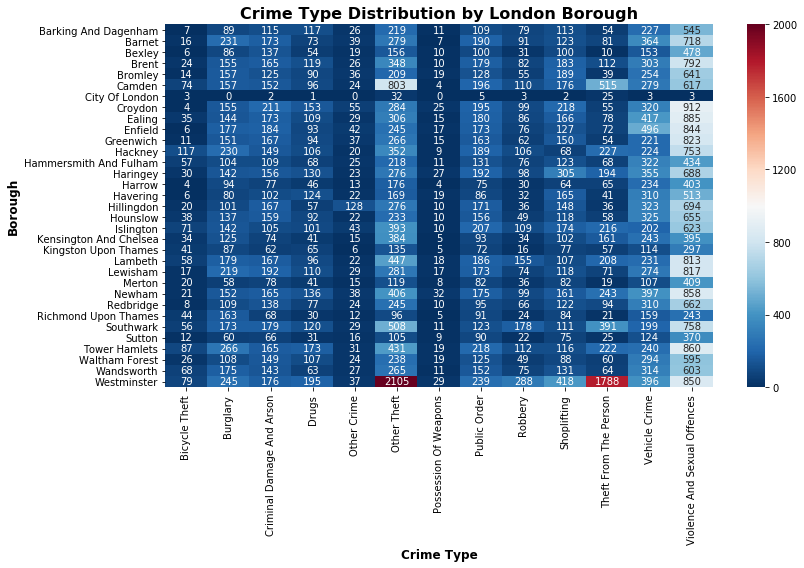

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by lsoa_name and crime_type, and calculate the count
grouped_data = df_selected.groupby(['lsoa_name', 'crime_type']).size().unstack()

# Replace NaN values with 0
grouped_data = grouped_data.fillna(0)

# Create a heatmap with blue to red color map
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(grouped_data, cmap='RdBu_r', annot=True, fmt='g', cbar=True, ax=ax, vmin=0, vmax=2000)

# Set the labels and title
ax.set_xlabel('Crime Type', fontsize=12, fontweight='bold')
ax.set_ylabel('Borough', fontsize=12, fontweight='bold')
ax.set_title('Crime Type Distribution by London Borough', fontsize=16, fontweight='bold')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Replace underscores with whitespace and capitalize x-axis labels
x_labels = [label.replace('_', ' ').title() for label in grouped_data.columns]
ax.set_xticklabels(x_labels)

# Replace underscores with whitespace and capitalize y-axis labels
y_labels = [label.replace('_', ' ').title() for label in grouped_data.index]
ax.set_yticklabels(y_labels)

# Adjust the layout
plt.tight_layout()

# Display the heatmap
plt.show()


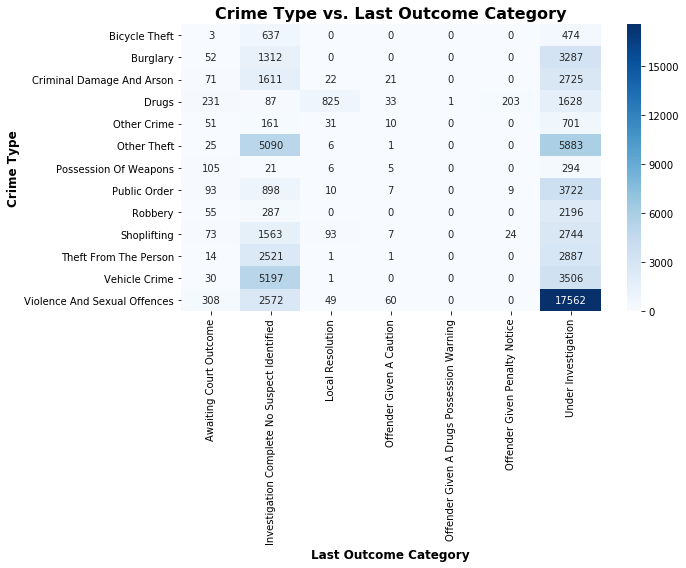

In [15]:
# Group the data by crime_type and last_outcome_category, and calculate the count
grouped_data = df_selected.groupby(['crime_type', 'last_outcome_category']).size().unstack()

# Replace NaN values with 0
grouped_data = grouped_data.fillna(0)

# Create a heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(grouped_data, cmap='Blues', annot=True, fmt='g', ax=ax)

# Set the labels and title
ax.set_xlabel('Last Outcome Category', fontsize=12, fontweight='bold')
ax.set_ylabel('Crime Type', fontsize=12, fontweight='bold')
ax.set_title('Crime Type vs. Last Outcome Category', fontsize=16, fontweight='bold')

# Replace underscores with whitespace and capitalize x-axis labels
x_labels = [label.replace('_', ' ').replace(';', '').title() for label in grouped_data.columns]
ax.set_xticklabels(x_labels)

# Replace underscores with whitespace and capitalize y-axis labels
y_labels = [label.replace('_', ' ').replace(';', '').title() for label in grouped_data.index]
ax.set_yticklabels(y_labels)

# Adjust the layout
plt.tight_layout()

# Display the heatmap
plt.show()

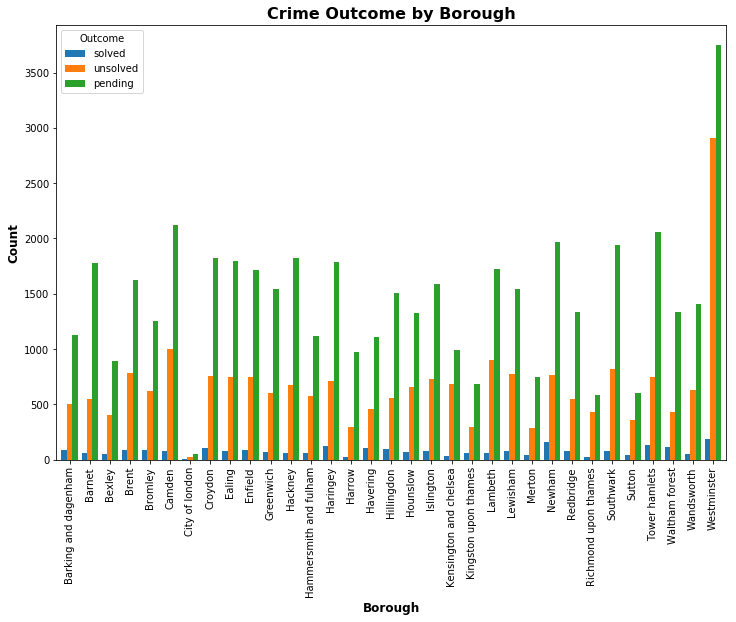

In [19]:
# Map the values in "last_outcome_category" column to the new column
outcome_mapping = {
    'under_investigation': 'pending',
    'local_resolution': 'solved',
    'investigation_complete;_no_suspect_identified': 'unsolved',
    'awaiting_court_outcome': 'solved',
    'offender_given_penalty_notice': 'solved',
    'offender_given_a_caution': 'solved',
    'offender_given_a_drugs_possession_warning': 'solved'
}

df_selected['Outcome'] = df_selected['last_outcome_category'].map(outcome_mapping)

# Group by borough and outcome, and calculate the count
grouped_data = df_selected.groupby(['lsoa_name', 'Outcome']).size().unstack()

# Define the order of categories
category_order = ['solved', 'unsolved', 'pending']

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data[category_order].plot(kind='bar', ax=ax, width=0.8)

# Set the labels and title
ax.set_xlabel('Borough', fontsize=12, fontweight='bold')
ax.set_ylabel('Count', fontsize=12, fontweight='bold')
ax.set_title('Crime Outcome by Borough', fontsize=16, fontweight='bold')

# Add a legend
ax.legend(title='Outcome')

# Format the axis labels
ax.set_xticklabels([label.replace('_', ' ').capitalize().replace(';', '') for label in grouped_data.index], rotation=90)

# Show the plot
plt.show()
